In [2]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

from scipy import fft
from scipy import stats


#import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn.decomposition import PCA


from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics

nx,ny=64,146
FA_spatial=np.load('full_spatial_features.npy')

ratio=ny/nx

n_pca=2048

ks=np.array(np.load('full/ks%i.npy'%n_pca))
ns_clusters_=[x for x in range(50,200,25)]+[x for x in range(200,400,50)]+[x for x in range(400,800,100)]+[x for x in range(800,2000,200)]+[x for x in range(2000,4000,400)]+[x for x in range(4000,8000,800)]+[8000,9300]#np.arange(100,9400,100)

n_clusters_=ns_clusters_[ks.argmin()]
print(n_clusters_,ks.min())

pca = PCA(n_components=n_pca, svd_solver='full')
pca_features=pca.fit_transform(FA_spatial)#components_
#pca_features=FA_spatial
connectivity = grid_to_graph(n_x=nx, n_y=ny)
ward = cluster.AgglomerativeClustering(n_clusters=n_clusters_, connectivity=connectivity, linkage='ward', compute_full_tree=True).fit(pca_features)
labels = ward.labels_
#labels=labels.reshape((nx,ny))

sil=metrics.silhouette_samples(pca_features,labels)

np.save('sil2048.npy',sil.reshape((nx,ny)))
np.save('label2048.npy',labels.reshape((nx,ny)))


#fig = plt.figure(constrained_layout=False,figsize=(12,12))


#plt.imshow(sil.reshape((nx,ny)),cmap='RdBu')
#plt.axis('off')

125 0.09078212151516257


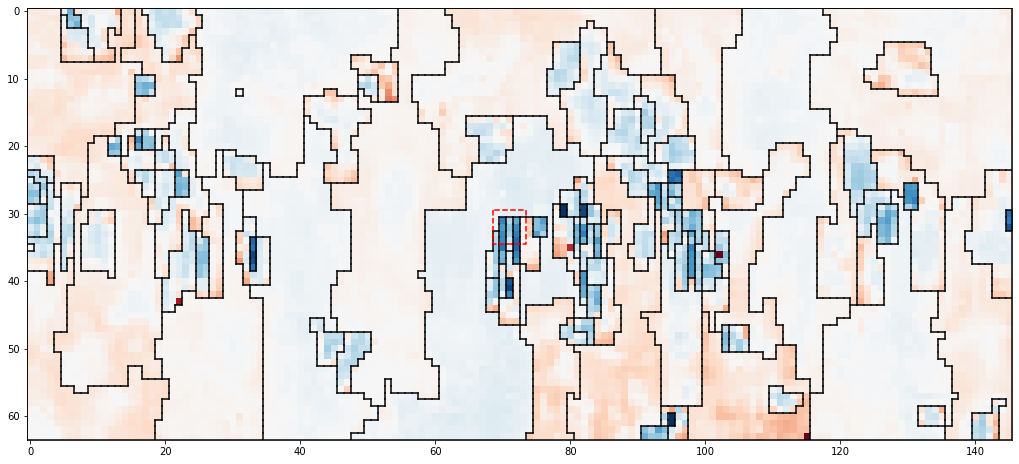

In [3]:
import sys
sys.path.append("..")
import numpy as np
import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec

from scipy import fft
from scipy import stats


#import lauetools.LaueTools.IOimagefile as IOimage

#from libtiff import TIFF

from sklearn.decomposition import PCA


from sklearn import cluster
from sklearn.feature_extraction.image import grid_to_graph

from sklearn import metrics

def draw(ax,labels):
    nx,ny=labels.shape
    ax.plot(np.array([0,nx,nx,0,0])-0.5,np.array([0,0,ny,ny,0])-0.5,'k')
    ax.set_aspect('equal')
    for i in range(nx):
        for j in range(ny-1):
            if labels[i,j]!=labels[i,j+1]:
                ax.plot(np.array([i,i+1])-0.5,np.array([j+1,j+1])-0.5,'k')
    for i in range(nx-1):
        for j in range(ny):
            if labels[i,j]!=labels[i+1,j]:
                ax.plot(np.array([i+1,i+1])-0.5,np.array([j,j+1])-0.5,'k')
    return None

sil,labels=np.load('sil2048.npy'),np.load('label2048.npy')
fig = plt.figure(constrained_layout=False,figsize=(12,12))

gs = fig.add_gridspec(nrows=1, ncols=1, left=0, right=0.5*ratio,bottom=0,top=0.5, wspace=0.07,hspace=0.14)#,sharex=True)

ax = fig.add_subplot(gs[0,0])

ax.imshow(sil.reshape((nx,ny)),cmap='RdBu')

#x1, x2, y1, y2 = 56,61,37,42
x1, x2, y1, y2 = 69,74,30,35

#draw(ax,np.flip(np.flip(labels.reshape((nx,ny)).T,0),1))
draw(ax,labels.reshape((nx,ny)).T)

ax.plot(np.array([x1,x1,x2,x2,x1])-0.5,np.array([y1,y2,y2,y1,y1])-0.5,'r--')